## imports

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

https://archive.ics.uci.edu/dataset/880/support2

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset support2
data = fetch_ucirepo(id=880) 

# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 

print(X.head())
print(y.head())

        age     sex            dzgroup             dzclass  num.co   edu  \
0  62.84998    male        Lung Cancer              Cancer       0  11.0   
1  60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2  52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3  42.38498  female        Lung Cancer              Cancer       2  11.0   
4  79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   

       income  scoma  charges  totcst  ...      bili      crea    sod  \
0    $11-$25k    0.0   9715.0     NaN  ...  0.199982  1.199951  141.0   
1    $11-$25k   44.0  34496.0     NaN  ...       NaN  5.500000  132.0   
2  under $11k    0.0  41094.0     NaN  ...  2.199707  2.000000  134.0   
3  under $11k    0.0   3075.0     NaN  ...       NaN  0.799927  139.0   
4         NaN   26.0  50127.0     NaN  ...       NaN  0.799927  143.0   

         ph  glucose  bun  urine  adlp  adls  adlsc  
0  7.459961      NaN  NaN    NaN   7.0   7.0    7.

## data exploration

In [2]:
X.shape

(9105, 42)

In [5]:
y.dtypes

death        int64
hospdead     int64
sfdm2       object
dtype: object

In [6]:
y[:2]

,death,hospdead,sfdm2
0,0,0,NaN
1,1,1,<2 mo. follow-up


In [8]:
y.death.value_counts()

death
1    6201
0    2904
Name: count, dtype: int64

In [9]:
y.hospdead.value_counts()

hospdead
0    6745
1    2360
Name: count, dtype: int64

In [10]:
y.sfdm2.value_counts()

sfdm2
<2 mo. follow-up       3123
no(M2 and SIP pres)    3061
adl>=4 (>=5 if sur)     916
SIP>=30                 564
Coma or Intub            41
Name: count, dtype: int64

In [14]:
X_num = X.select_dtypes(include=['float64', 'int64'])
X_num.head(2)

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,62.84998,0,11.0,0.0,9715.0,NaN,NaN,7.0,33.898438,20.0,...,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.0
1,60.33899,2,12.0,44.0,34496.0,NaN,NaN,29.0,52.695312,74.0,...,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.0


In [32]:
def analyze_numeric_variable(df, column_name, bins=30):
    """
    Analyze a numeric variable in detail, accounting for missing values.

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    column_name (str): Name of the numerical column to analyze
    bins (int): Number of bins for histogram

    Returns:
    dict: Dictionary containing analysis results
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    # Separate complete and missing data
    data_complete = df[df[column_name].notna()][column_name]
    data_missing = df[df[column_name].isna()].copy()

    analysis = {
        'descriptive_stats': data_complete.describe(),
        'skewness': data_complete.skew(),
        'kurtosis': data_complete.kurtosis(),
        'normality_test': stats.normaltest(data_complete),
        'missing_count': len(data_missing),
        'missing_percentage': round((len(data_missing) / len(df) * 100),2)
    }

    # Create visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    # Histogram
    sns.histplot(data=df, x=column_name, bins=bins, ax=ax1)
    ax1.set_title(f'Distribution of {column_name}')

    # Box plot
    sns.boxplot(data=df, y=column_name, ax=ax2)
    ax2.set_title(f'Box Plot of {column_name}')

    # Missing value patterns over index
    ax3.scatter(data_missing.index, data_missing[column_name], alpha=0.5)
    if len(data_missing)==0:
        ax3.text(.001, .01, 'No missing values')
    ax3.set_title(f'Missing Pattern of {column_name}')

    plt.tight_layout()
    plt.show()

    #return analysis

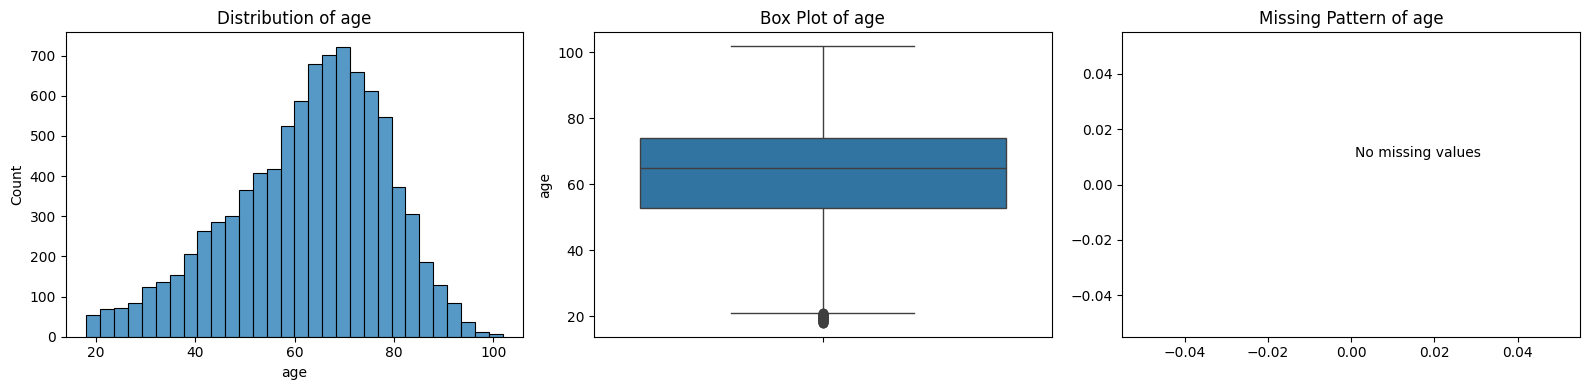

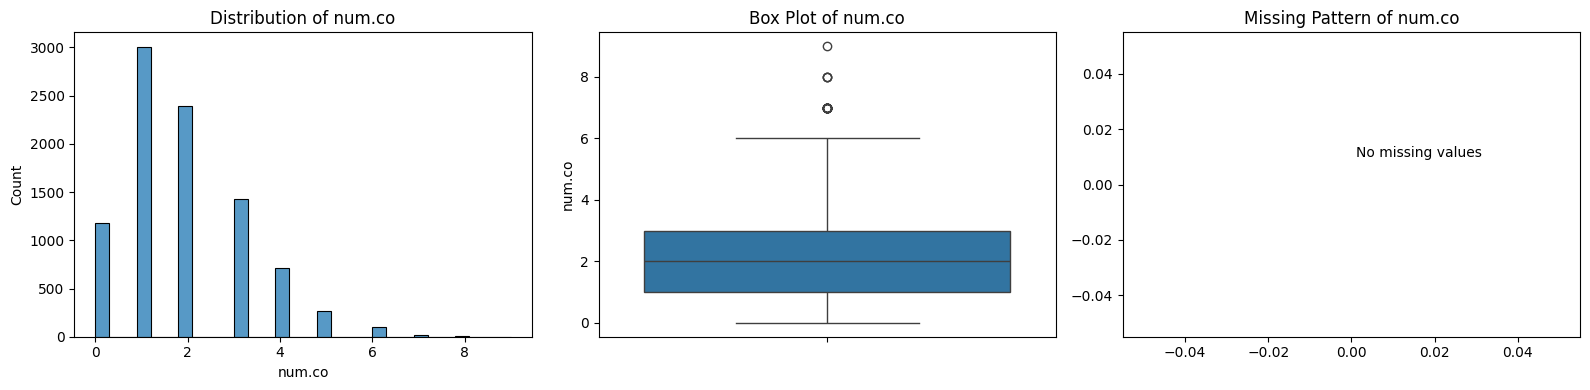

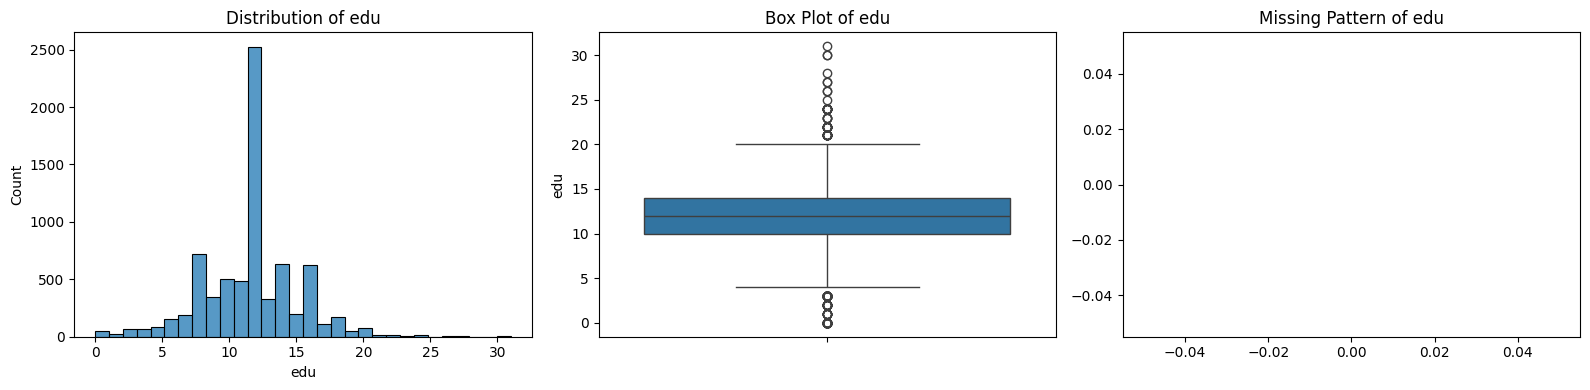

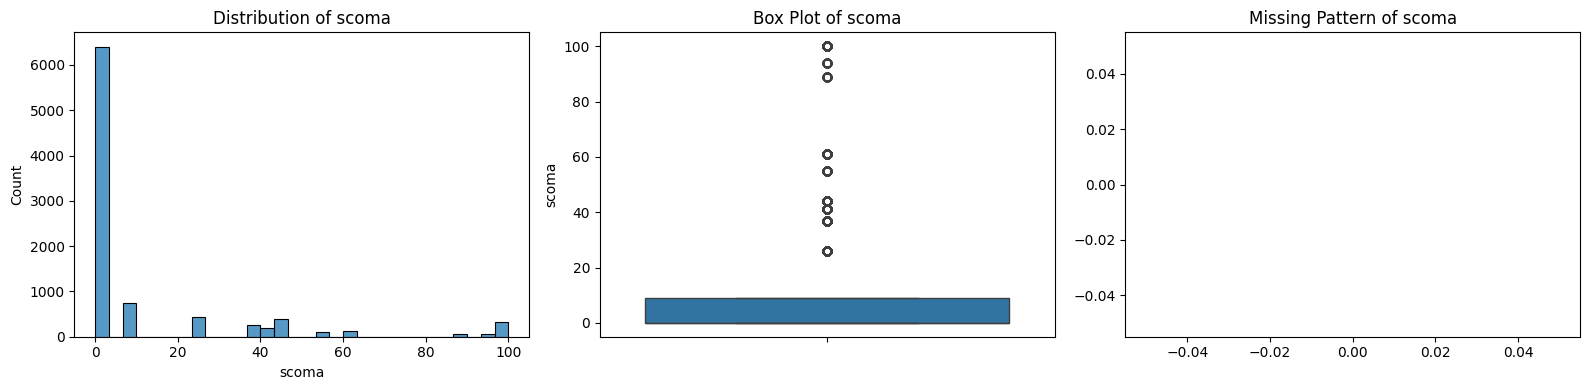

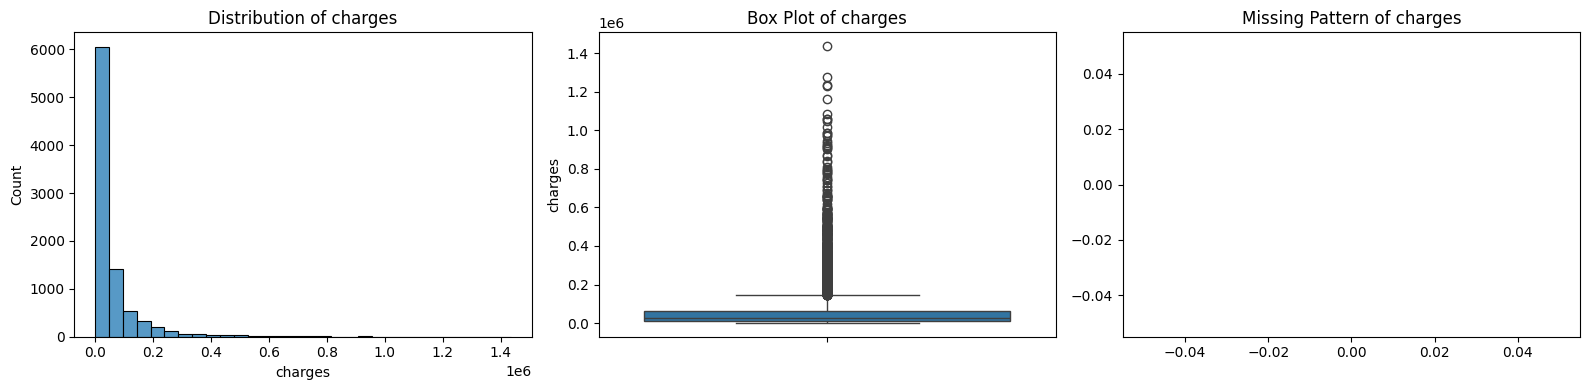

In [33]:
for i, col in enumerate(X_num.columns):
    if i < 5:
        analyze_numeric_variable(X_num, col)

In [15]:
X_obj = X.select_dtypes(include=['object'])
X_obj.head(2)

,sex,dzgroup,dzclass,income,race,ca,dnr
0,male,Lung Cancer,Cancer,$11-$25k,other,metastatic,no dnr
1,female,Cirrhosis,COPD/CHF/Cirrhosis,$11-$25k,white,no,NaN


In [16]:
X_obj.income.unique()

array(['$11-$25k', 'under $11k', nan, '$25-$50k', '>$50k'], dtype=object)